# Neural Networks with TensorFlow
In this module, we're gonna be talking about how neural networks work and a little bit of the math behind them. Talking about gradient descent, back propagation, and how information flows to the neural network.

The whole point of neural network is to make a prediction or classification.  So, given some input information, then we feed it to the neural network, and then we want it to give us some output.

There are 3 types of layer in neural network:
- Input Layer: This layer receives the input information of something we want to predict/classify. For example, if we are classifying handwritten digits given an image, then our input information are the values of each pixel of the image we want to predict/classify. So, if the image is 28 $\times$ 28 pixels, then there would be 28 $\times$ 28 = 784 input neurons/nodes for the input layer.

- Output Layer: This layer is going to have as many neurons (nodes) as output pieces that we want. For example, we want to classify images into 2 classes, we could use one output neuron whose values guaranteed to lie in [0, 1], we can say if the output value is closer to 0 then it would be class 0 and if it's closer to 1 then it would be class 1. In other instances, when we're doing classification, what makes more sense is to have as many output neurons as classes you're looking to predict for where each neuron lies in [0,1] and their sum is 1, this forms a probability distribution. And, when doing regression task, we would have one output neuron.

- Hidden layer: We can have as many hidden layers as we want. Its called hidden because we don't observe it when we're using neural network.

Each neuron (node) in layer is connected to neuron in another layer with **weight** (edge). These weights are the trainable parameters that neural network will tweak and change to get the best possible result.

An extra adjustable constant added to each neuron's weighted sum is called **bias**.

The value of each neuron $N$ in the next layer is the weighted sum of all neurons from the previous layer with their respective weights that are connected to neuron $N$ plus the bias for that particular neuron which then we apply **activation function** to.


## Activation Function
Activation functions are simply a function that is applied to the weighted sum of a neuron. They can be anything we want but are typically higehr order/degree functions that aim to add higher dimension of our data. We would want to do this to introduce more complexity to our model. By transforming our data to a higher dimension we can typically make better, more complex predictions.

The followings are some common activation functions:
- Relu (Rectified Linear Unit)
- Tanh (Hyperbolic Tangent)
- Sigmoid

## Loss Function
Loss functions calculate how far away our output was from our expected output, it is going to give some value that represents how bad or how good this network. If it tells the network was really bad, it gives a really high loss, then that tells us that we need to tweak the weights and biases more and move to in a different direction.

The followings are common loss/cost functions:
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

## Gradient Descent and Backpropagation
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal parameters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

## Optimizer
Optimizer is simply the function that implements the backpropagation algorithm. 

Here are some common optimization functions:
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

## Imports

In [19]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Dataset
For this tutorial, we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [20]:
fashion_mnist = keras.datasets.fashion_mnist   # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()   # split into testing and training

4422102/4422102 [==============================] - 0s 0us/step


Let's have a look at this data to see what we are working with.

In [33]:
train_images.shape

(60000, 28, 28)

So, we've got 60,000 images that are made up of 28 $\times$ 28 pixels (784 in total).

In [35]:
train_images[0, 23, 23] # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [36]:
train_labels[:10] # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finally. let's look at what some of these images look like!

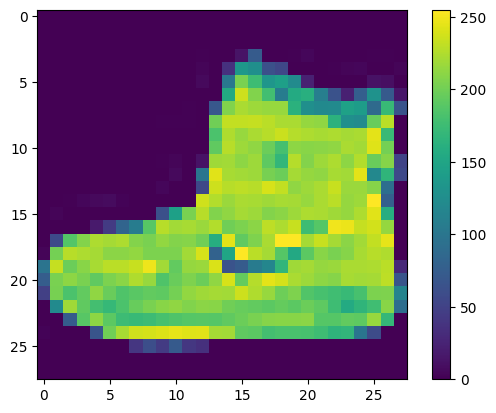

In [68]:
plt.figure()
plt.imshow(train_images[0]) # plt.imshow() takes a 2D array and displays image that representing that array
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [69]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model
Now it's time to build the model! We are going to use keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes value from left to right). We'll break down each layer and its architecture below.

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # input layer (1)
    keras.layers.Dense(128, activation='relu'),   # hidden layer (2)
    keras.layers.Dense(10, activation='softmax')  # output layer (3)
])

**Layer 1:** This is our input layer and it will consist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output layerand is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represents the probability of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probability of the image being that class.

## Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. We won't fo into detail about why we chose each of these right now.

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model
Now it's finally time to train the model.

In [74]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 1s 495us/step - loss: 0.2309 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 1s 501us/step - loss: 0.2229 - accuracy: 0.9160
Epoch 3/10
1875/1875 [==============================] - 1s 493us/step - loss: 0.2166 - accuracy: 0.9180
Epoch 4/10
1875/1875 [==============================] - 1s 499us/step - loss: 0.2102 - accuracy: 0.9224
Epoch 5/10
1875/1875 [==============================] - 1s 496us/step - loss: 0.2039 - accuracy: 0.9233
Epoch 6/10
1875/1875 [==============================] - 1s 497us/step - loss: 0.1979 - accuracy: 0.9255
Epoch 7/10
1875/1875 [==============================] - 1s 496us/step - loss: 0.1922 - accuracy: 0.9270
Epoch 8/10
1875/1875 [==============================] - 1s 564us/step - loss: 0.1872 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 1s 502us/step - loss: 0.1840 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 1s 486u

## Evaluating the Model
Now it's time to test/evaluate the model. We can do this using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

(https://keras.io/models/sequential/)

In [75]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 339us/step - loss: 0.3497 - accuracy: 0.8867
Test accuracy: 0.8866999745368958


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

Now we have a trained model that's ready to use to predict some values!

## Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to `.predict()` method.

In [79]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 308us/step


This method return to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [80]:
predictions[0]

array([3.0814620e-10, 2.1893593e-14, 2.0533968e-14, 3.7638937e-11,
       3.2119089e-11, 9.4900839e-05, 4.0772044e-08, 2.5110977e-04,
       7.7709375e-12, 9.9965394e-01], dtype=float32)

Those 10 values form a probability distribution across the 10 classes. We want the class which has the highest probability.

## Checking

Pullover


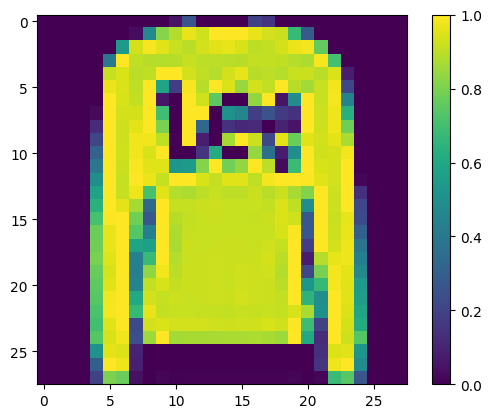

In [125]:
k=1
print(class_names[np.argmax(predictions[k])])  # np.argmax() returns the index of the maximum value in an array
plt.figure()
plt.imshow(test_images[k])
plt.colorbar()
plt.grid(False)
plt.show()

## Verifying Predictions
Small function to help us verify predictions with some simple visuals.

1/1 [==============================] - 0s 11ms/step


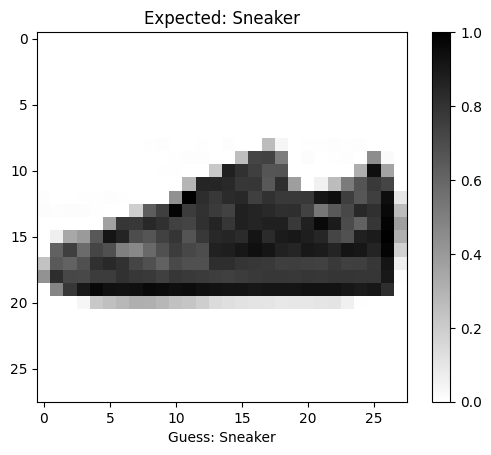

In [128]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a numer: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)